## Lab 2: Analysis of Algorithms

By: ** Ryan Neff **  
ryan.neff@icahn.mssm.edu  
Due: 1/30/19

In [1]:
###
# Lab 2: Analysis of Runtimes
# http://rosalind.info/classes/581/
###

# borrowing functions from week 1
import numpy as np

def fibonacci(n):
    f = np.ones(n)
    for i in range(2,n):
        f[i] = f[i-1] + f[i-2]
    return f[n-1]

def recursive_fibonacci(n):
    if n == 1 or n == 2:
        return 1
    else:
        a = recursive_fibonacci(n-1)
        b = recursive_fibonacci(n-2)
    return a + b


In [2]:
'''
Example 1. Implementation of General Purpose Single-Array Integer-Based Doubling Experiment for Fibonacci and 
Any Other Single-Array Integer Function
Background: A quick in silico experiment one can conduct to test the complexity scaling of a particular function such
as fibonacci (which we call a 'Single-Array Integer-Based function') is to build a general purpose 'wrapper' function
that takes in that particular function and a desired maximum array size and iterate over array sizes that double 
(simulating problem complexity) and record how the runtime changes as a function of input size.
'Fun' reading: https://www.nayuki.io/page/fast-fibonacci-algorithms

Given: A desired starting array size (e.g. n = 2), a maximum bound (n_max) and a function func (e.g. fibonacci(n))

Return: A matrix/nested list/2D np array/dict where each row is an 'observation' i.e. the first entry is the problem
size and the second entry is the runtime.

Problem:
(a) Write a function time_trial(n, func) that takes in a particular problem size and function func and returns the time
it took for that problem to run. The function time.process_time() may be useful here.

(b) Write a function doubling_test(n, n_max, func) that takes in n, n_max and func using the helper function above to 
return a list of tuples [[2, 100],[4, 400],[8, 1600],...] where the first entry of each nested tuple is the size of the 
array and the second entry is the run time. 


'''
import time

# time_trial() has two arguments
# 1. func() - takes an integer performs a calculation on an array generated from that integer
# ex. func() could be fibonacci(n) which generates the fibonacci sequence and returns the n-th fibonacci number
# 2. n - integer value of the problem size, here the argument for func() above
# returns the time it takes to generate and solve 

def time_trial(n, func):
    start = time.process_time()
    output = func(n)
    fin = time.process_time()
    return fin - start 

# doubling_test() has three arguments
# 1. n - integer for problem size (starting, e.g. n = 2)
# 2. n_max - the largest value for problem size (ending, e.g. n_max = 128)
# returns a data matrix of value pairs; the problem size and corresponding run time

def doubling_test(n, n_max, func):
    data = []
    while n < n_max: # n = 2, 4, 8, ... 
        current = time_trial(n, func)
        print(n, current)
        # [2, 1e-05], [4, 2e-05], [8, 4e-05] etc.
        data.append([n, current])
        n *= 2
    return np.array(data)

print('The doubling test for recursive fibonacci')
recursive_data = doubling_test(2, 50, recursive_fibonacci)

print('The doubling experiment for faster fibonacci')
interative_data = doubling_test(2, 2000, fibonacci)


The doubling test for recursive fibonacci
2 1.0999999999983245e-05
4 8.000000000008e-06
8 1.6999999999933735e-05
16 0.0003429999999999822
32 0.7033309999999999
The doubling experiment for faster fibonacci
2 4.300000000023729e-05
4 3.700000000006476e-05
8 4.099999999995774e-05
16 2.300000000010627e-05
32 2.3999999999801958e-05
64 3.399999999986747e-05
128 5.3999999999998494e-05
256 9.700000000001374e-05
512 0.00023399999999984544
1024 0.0008030000000001092


(-0.1, 2)

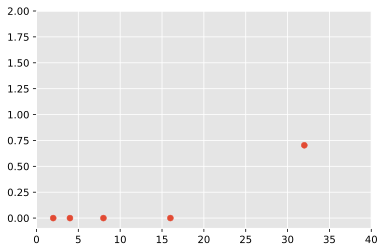

In [3]:
'''
Example 2a. Study of Fibonacci Complexity Scaling, Plotting Results Linear and Log-Log in Matplotlib
Here we plot the runtimes for the recursive data on linear and log-log plot scales.
'''
import matplotlib.pyplot as plt
from matplotlib import rcParams
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

plt.style.use('ggplot')
rcParams['figure.figsize'] = (5,4)
rcParams['figure.dpi'] = 200
rcParams['font.family'] = 'DejaVu Sans'

COLOR = 'black'
rcParams['text.color'] = COLOR
rcParams['axes.labelcolor'] = COLOR
rcParams['xtick.color'] = COLOR
rcParams['ytick.color'] = COLOR

n_data = recursive_data[:,0]
time_data = recursive_data[:,1]

plt.figure(figsize=(6, 4))
plt.scatter(n_data, time_data)
plt.xlim(0, 40)
plt.ylim(-0.1, 2)

#plt.scatter(np.log(n_data), np.log(time_data))
#plt.xlim(0, 5)
#plt.ylim(-15, 10)

(-0.0001, 0.005)

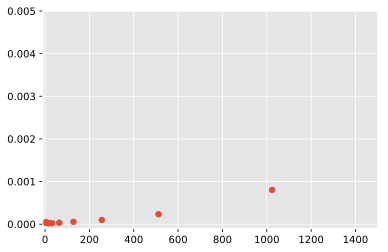

In [4]:
'''
Example 2b. Study of Fibonacci Complexity Scaling, Plotting Results Linear and Log-Log in Matplotlib
'''

# slice data
n_data = interative_data[:,0]
time_data = interative_data[:,1]

plt.figure(figsize=(6, 4))
plt.scatter(n_data, time_data)
plt.xlim(-10, 1500)
plt.ylim(-0.0001, 0.005)

#plt.scatter(np.log(n_data), np.log(time_data))
#plt.xlim(0, 8)
#plt.ylim(-12, 0)



The doubling time for two sum naive
2 4.7999999999603915e-05
4 3.8000000003535206e-05
8 9.899999999873899e-05
16 0.00018000000000029104
32 0.0002589999999997872
64 0.0008720000000010941
128 0.0031959999999955357
256 0.012142000000004316
512 0.043376999999999555
1024 0.1671350000000018
2048 0.5987059999999929


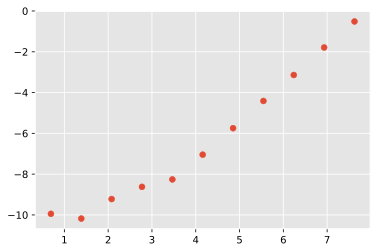

In [264]:
'''
Example 3. Two-sum and improvements
Background: Recall the in class implementation of two-sum naive that seems intuitively inefficient and can be shown
to run in O(n^2) (why?). In the next problem, we will construct a faster version.
'''
# set seed
np.random.seed(0)

# visualize on 2D array
def two_sum_naive(n,lst=None):
    if type(lst)==type(None):
        lst = np.random.randint(low = -100, high = 100 + 1, size = n)
    lst.sort()
    count = 0
    for i in range(len(lst)):            # i = 0, lst[i] = 1
        for j in range(i + 1, len(lst)): # i = 0, j = 1 -> lst[i] = 1, lst[j] = -31
            if (lst[i] + lst[j] == 0):   # i = 0, j = 2 -> lst[i] = 1, lst[j] = 26 ... etc.
                count += 1
                #print("naive:",lst[i],lst[j])
                break ## EXCLUDE DUPLICATES
    return count

print('The doubling time for two sum naive')
naive_data = doubling_test(2, 4000, two_sum_naive)

n_data = naive_data[:,0]
time_data = naive_data[:,1]

plt.figure(figsize=(6, 4))
#plt.scatter(n_data, time_data)
plt.scatter(np.log(n_data), np.log(time_data))

The doubling time for two sum improved
2 0.00011700000000303135
4 3.499999999689862e-05
8 5.1000000013345925e-05
16 9.599999999920783e-05
32 0.00010000000000331966
64 0.00028500000000519776
128 0.0003410000000059199
256 0.001004999999992151
512 0.001497999999998001
1024 0.004176000000001068
2048 0.008093999999999824


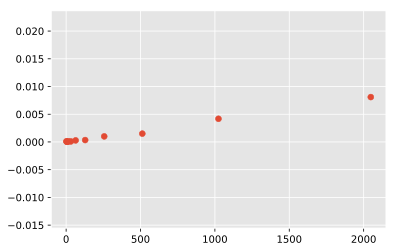

In [284]:
'''
Problem 1. Two-sum and improvements (continued)
Given: an array size n

Return: a function two_sum_improved(n) that builds a random array of integers - here we use 
np.random.randint(low = -100, high = 100 + 1, size = n) 
- and returns the number of pairs that sum to 0 (excluding duplicates).

Problem:
(a) Construct a list lst of random integers from -100 to 100 of size n and sort them.
(b) Using the provided binarySearch function (that takes in a list and a particular item of interest for which we are 
searching), construct a function two_sum_improved(n) that takes in a list and uses the lines from (a) to return the 
number of pairs that sum to 0. 

'''
# binarySearch - take for granted now that this runs in O(log(n)) 
# example: binarySearch([1,2,4], 2) returns True
# where alist = [1,2,4] and item = 2

def binarySearch(alist, item):
    first = 0
    last = len(alist) - 1
    found = False
    while first <= last and not found:
        midpoint = (first + last)//2
        if alist[midpoint] == item:
            found = True
        else:
            if item < alist[midpoint]:
                last = midpoint - 1
            else:
                first = midpoint + 1
    return found

# TODO
# generate random list of integers size n
# sort list
# initialize counter 
# ...

def two_sum_improved(n,lst=None):
    if type(lst)==type(None):
        lst = np.random.randint(low = -100, high = 100 + 1, size = n)
    lst.sort() # in place, ascending order, O(n log n) (Timsort, merge sort)
    count = 0
    # fill in here
    for ix1 in range(0,len(lst)):
        if binarySearch(lst[ix1+1:len(lst)],-lst[ix1]):
            count += 1
            #print("improved:",lst[ix1],-lst[ix1])
    return count

n = 128
lst = np.random.randint(low = -100, high = 100 + 1, size = n)
if two_sum_naive(n,lst.copy()) != two_sum_improved(n,lst.copy()):
    print(two_sum_naive(n,lst.copy()),
          two_sum_improved(n,lst.copy()),
          two_sum_naive(n,lst.copy()) == two_sum_improved(n,lst.copy()))
    raise Exception("Functions are not identical.")


print('The doubling time for two sum improved')
improved_data = doubling_test(2, 4000, two_sum_improved)

n_data = improved_data[:,0]
time_data = improved_data[:,1]

plt.figure(figsize=(6, 4))
plt.scatter(n_data, time_data)
#plt.scatter(np.log(n_data), np.log(time_data))

The doubling time for three sum naive
2 4.999999998744897e-05
4 7.499999999538431e-05
8 0.00019600000000252749
16 0.0004020000000082291
32 0.002807000000004223
64 0.023676000000008912
128 0.17644300000000612
256 1.3122019999999992


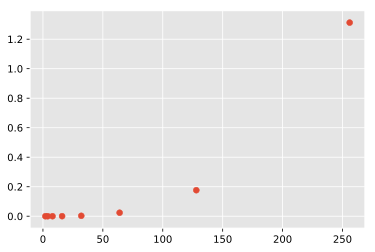

In [285]:
'''
Example 4. 3-Sum Improvements
Recall the implementation of three_sum_naive in class that ran in O(n^3). Here we will use the same logic to improve upon
and develop a faster 3-sum.
'''

def three_sum_naive(n,lst=None):
    if type(lst)==type(None):
        lst = np.random.randint(low = -100, high = 100 + 1, size = n)
    lst.sort() # in place, ascending order, O(n log n) (Timsort, merge sort)
    count = 0
    for i in range(len(lst)):
        for j in range(i + 1, len(lst)):
            for k in range(j + 1, len(lst)):
                if (lst[i] + lst[j] + lst[k] == 0):
                    count += 1
                    break ## exclude some duplicates
    return count


# let us use the same logic to improve this; what is the new runtime?

print('The doubling time for three sum naive')
naive_data = doubling_test(2, 500, three_sum_naive)

n_data = naive_data[:,0]
time_data = naive_data[:,1]

plt.figure(figsize=(6, 4))
plt.scatter(n_data, time_data)
#plt.scatter(np.log(n_data), np.log(time_data))




The doubling time for three sum improved
2 3.5999999994373866e-05
4 6.199999999978445e-05
8 7.200000000295859e-05
16 0.0002309999999994261
32 0.0010390000000057853
64 0.004594999999994798
128 0.021804000000003043
256 0.09433500000000095


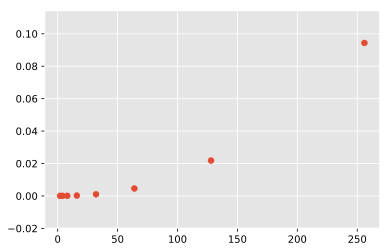

In [286]:
'''
Problem 2. 3-Sum Improvements
Use binary search and analogous logic to improve this; write a function three_sum_improved(n) that computes the number of
triplets in a list that sum to 0 with a runtime faster than O(n^3).
'''
def three_sum_improved(n,lst=None):
    if type(lst)==type(None):
        lst = np.random.randint(low = -100, high = 100 + 1, size = n)
    lst.sort() # in place, ascending order, O(n log n) (Timsort, merge sort)
    count = 0
    
    # fill in here
    for ix1 in range(0,len(lst)):
        for ix2 in range(ix1+1,len(lst)):
            target = -1*(lst[ix1]+lst[ix2])
            if binarySearch(lst[ix2+1:len(lst)],target):
                count += 1
            #print("improved:",lst[ix1],-lst[ix1])
    return count

n = 128
lst = np.random.randint(low = -100, high = 100 + 1, size = n)
if three_sum_naive(n,lst.copy()) != three_sum_improved(n,lst.copy()):
    print(three_sum_naive(n,lst.copy()),three_sum_improved(n,lst.copy()),
          three_sum_naive(n,lst.copy()) == three_sum_improved(n,lst.copy()))
    raise Exception("Functions are not identical.")

print('The doubling time for three sum improved')
improved_data = doubling_test(2, 500, three_sum_improved)

n_data = improved_data[:,0]
time_data = improved_data[:,1]

plt.figure(figsize=(6, 4))
plt.scatter(n_data, time_data)
#plt.scatter(np.log(n_data), np.log(time_data))

In [ ]:
'''
Problem 3.
Provide the big-O times for the following code blocks.
The following formula may be useful: n + nr + nr^2 + nr^3 + ... = n / (1 - r)

a.
def problem_a(n):
    sum = 0 
    i = n
    while i > 0:
        for j in range(n):
            sum += 1        
        i = i // 2
    return sum 

## ANSWER 3a: N*(log2(N)+1). The function loops over all N in the inner loop a total 
number of times proportional to 2^(i+1)=N or i = log2(N)+1 (since it goes through 1 before it gets to 0)
which is the termination criteria for the while loop.

b.
def problem_b(n):
    sum = 0
    k = n
    while k > 0:
        for i in range(k):
            sum += 1
        k = k // 2
    return sum

## ANSWER 3b: same as HW1 problem 6a = 2N. The program loops through all N 
the first round, then loops through the series where k is N/2,N/4... 
until k is 1. this series adds up to N so the total time is 2*N.
    
c.    
def problem_c(n):
    sum = 0
    i = n/2
    while i < n: (N/2)
        j = 1
        while j < n: (log2(N))
            k = 1
            while k < n: (log2(N))
                sum += 1
                k = k * 2
            j = j * 2    
        i += 1
    return sum 

##ANSWER 3c: (N/2)*(log2(N)^2). i loops from N/2 to N which is multiplied by the inner loop j
which loops log2(N) times (since it is multiplied by 2 each time) and its inner loop k
which does the same thing. 
'''

In [ ]:
'''
Problem 4.
Give tilde approximations for the following quantities:
a. 2n + 3                        ### ~2n
b. 2log(n) + n + 3n^3 + 3        ### ~3n^3
c. 1/n + log(n)                  ### ~log(n)
d. n^4 / n^3                     ### ~n
e. n^2 + 2^n                     ### ~2^n
'''